# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir("../input")) 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import re
dataset = pd.read_csv('../input/kaadoo/KaDo.csv')
dataset.dataframeName = 'KaDo.csv'
dataset.loc[dataset["UNIVERS"]=="HYG_DOUCHE JARDINMONDE", "UNIVERS"] = "Douche"
dataset.loc[dataset["UNIVERS"]=="PARF_EAUX PARFUMS", "UNIVERS"] = "Parfums"
dataset.loc[dataset["UNIVERS"]=="HYG_DOUCHE JARDINMONDE", "UNIVERS"] = "Douche"
# dataset.index=dataset["CLI_ID"]

dataset["ok"] = dataset.groupby('CLI_ID')['FAMILLE'].transform('count')
# dataset = dataset.drop(columns='CLI_ID')
dataset.head(30)

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID,ok
0,35592159,10,1.67,HYGIENE,Douche,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281,5
1,35592159,10,1.66,HYGIENE,Douche,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281,5
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281,5
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281,5
4,35592159,10,1.67,HYGIENE,Douche,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281,5
5,35509899,9,13.00,PARFUMAGE,Parfums,PARF_PARFUM,EDT UN MATIN AU JARDIN 100ML MUGUET,13290776,9
6,35509899,9,5.50,SOINS DU CORPS,CORPS_LAIT HUILE PLAISIRNATURE,CORPS_HYDR_LAIT_HUILE,LAIT VELOUTE COCO PN2 400ML,13290776,9
7,36417517,12,1.75,HYGIENE,HYG_DOUCHE PARFUMS,HYG_PARFUMEE,GD LILAS FP FL200ML,13290776,9
8,36417517,12,1.76,HYGIENE,HYG_DOUCHE PARFUMS,HYG_PARFUMEE,GD LILAS FP FL200ML,13290776,9
9,36417517,12,2.25,HYGIENE,HYG_DOUCHE PARFUMS,HYG_PARFUMEE,GD LILAS FP FL200ML,13290776,9


In [2]:
#test2 = dataset[['TICKET_ID','MOIS_VENTE','CLI_ID','FAMILLE']]
test2 = dataset.groupby(["CLI_ID", "FAMILLE","MOIS_VENTE", "PRIX_NET"])["TICKET_ID"].count()#dataset.groupby(["TICKET_ID"],["MOIS_VENTE"])["CLI_ID"].unique()
test2.head(20)

CLI_ID    FAMILLE          MOIS_VENTE  PRIX_NET
1490281   HYGIENE          10          1.66        1
                                       1.67        2
          SOINS DU VISAGE  10          5.95        1
                                       7.45        1
13290776  HYGIENE          12          1.75        1
                                       1.76        1
                                       2.25        1
          PARFUMAGE        9           13.00       1
                           12          10.55       1
                                       11.04       1
          SOINS DU CORPS   9           5.50        1
                           12          4.02        1
                                       5.63        1
20163348  MAQUILLAGE       1           7.45        1
20200041  SOINS DU CORPS   1           1.25        1
          SOINS DU VISAGE  1           5.45        1
20561854  CAPILLAIRES      3           2.95        1
          HYGIENE          3           2.45        

In [3]:
# test3 = dataset.groupby(["CLI_ID","FAMILLE","MOIS_VENTE"])["PRIX_NET"].sum()#dataset.groupby(["TICKET_ID"],["MOIS_VENTE"])["CLI_ID"].unique()
# test_z = dataset.groupby(['CLI_ID'])['TICKET_ID'].sum()
new_df = dataset.loc[:,['CLI_ID', 'TICKET_ID', 'FAMILLE', 'PRIX_NET']]
new_df['freq'] = dataset.groupby('CLI_ID')['TICKET_ID'].transform('count')
new_df['Total_prix'] = dataset.groupby('TICKET_ID')['PRIX_NET'].transform('sum')
new_df['c'] = dataset.groupby('FAMILLE')['FAMILLE'].transform('count')
new_df = new_df.drop_duplicates(subset='CLI_ID')
new_df.head(50)

,CLI_ID,TICKET_ID,FAMILLE,PRIX_NET,freq,Total_prix,c
0,1490281,35592159,HYGIENE,1.67,5,18.40,2095077
5,13290776,35509899,PARFUMAGE,13.00,9,18.50,628087
14,20163348,33002894,MAQUILLAGE,7.45,1,7.45,1694751
15,20200041,33064616,SOINS DU VISAGE,5.45,2,6.70,1494034
17,20561854,33534570,HYGIENE,2.45,3,7.05,2095077
20,20727324,32975823,HYGIENE,4.95,5,11.75,2095077
25,20791601,34233630,SOINS DU CORPS,4.95,4,23.80,878923
29,21046542,32983494,SOINS DU CORPS,2.95,32,11.30,878923
61,21239163,33153030,HYGIENE,6.20,5,12.65,2095077
66,21351166,33060931,SOINS DU VISAGE,4.45,2,7.40,1494034


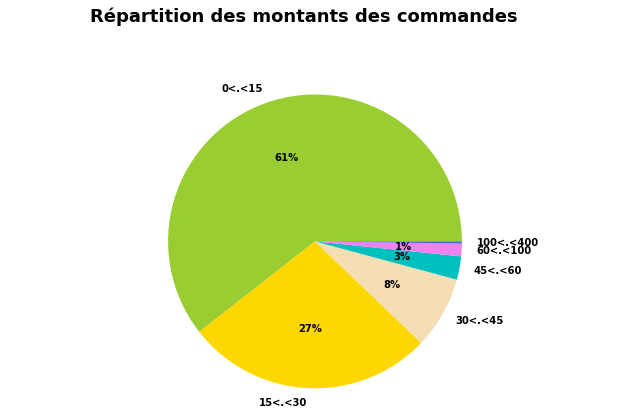

In [4]:
import matplotlib.pyplot as plt
price_range = [0, 15, 30, 45, 60, 100, 400]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = new_df[(new_df['Total_prix'] < price) &
                       (new_df['Total_prix'] > price_range[i-1])]['Total_prix'].count()
    count_price.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Répartition des montants des commandes", ha='center', fontsize = 18);

In [5]:
new_df.head(50)

,CLI_ID,TICKET_ID,FAMILLE,PRIX_NET,freq,Total_prix,c
0,1490281,35592159,HYGIENE,1.67,5,18.40,2095077
5,13290776,35509899,PARFUMAGE,13.00,9,18.50,628087
14,20163348,33002894,MAQUILLAGE,7.45,1,7.45,1694751
15,20200041,33064616,SOINS DU VISAGE,5.45,2,6.70,1494034
17,20561854,33534570,HYGIENE,2.45,3,7.05,2095077
20,20727324,32975823,HYGIENE,4.95,5,11.75,2095077
25,20791601,34233630,SOINS DU CORPS,4.95,4,23.80,878923
29,21046542,32983494,SOINS DU CORPS,2.95,32,11.30,878923
61,21239163,33153030,HYGIENE,6.20,5,12.65,2095077
66,21351166,33060931,SOINS DU VISAGE,4.45,2,7.40,1494034


In [6]:
new_df['note'] = new_df['freq'] / new_df['Total de famille']
new_df.head(50)

KeyError: 'Total de famille'

In [ ]:
test3["TotalPrice"] = test3["PRIX_NET"].sum()
test3.sort_values("CLI_ID")[:5]

In [ ]:
dataset['UNIVERS'].value_counts()

In [ ]:

#a = dataset[['TICKET_ID','MOIS_VENTE','FAMILLE']]["TICKET_ID"].count()
#dataset.head(20)
#test2 = dataset[['TICKET_ID','MOIS_VENTE','CLI_ID','FAMILLE']]
test_fi = dataset.groupby(["CLI_ID", "FAMILLE","MOIS_VENTE"])["TICKET_ID"].count()#dataset.groupby(["TICKET_ID"],["MOIS_VENTE"])["CLI_ID"].unique()

test_fi.head(20)


In [ ]:
test_fi2 = dataset.groupby(["CLI_ID", "MOIS_VENTE"])["PRIX_NET"].count()#dataset.groupby(["TICKET_ID"],["MOIS_VENTE"])["CLI_ID"].unique()

test_fi2.head(20)

In [ ]:
gkk = dataset.groupby(['CLI_ID', 'FAMILLE'])
temp = dataset.groupby(['CLI_ID', 'TICKET_ID', 'UNIVERS','MAILLE']).count() 
# Print the first value in each group
gkk.first()

In [ ]:
b = dataset['UNIVERS'].unique
b = dataset.replace("HYG_DOUCHE JARDINMONDE","Douche")
print(b)

In [ ]:
#test2 = dataset[['TICKET_ID','MOIS_VENTE','CLI_ID','FAMILLE']]
test2 = dataset.groupby(["TICKET_ID"],["MOIS_VENTE"])["CLI_ID"].unique()
test2.head(20)

In [ ]:
a.insert(2, "profit", count(ticket, allow_duplicates=False)



In [ ]:
dataset.shape

In [ ]:
dataset.info()

In [ ]:
dataset.isnull().sum()

nombre de Produit différents dans le dataframe

In [ ]:
# temp = dataset['CLI_ID', "TICKET_ID", "UNIVERS","MAILLE"].groupby(["CLI_ID", "TICKET_ID", "UNIVERS","MAILLE"]).count()
# temp = temp.reset_index(drop = False)
# countries = temp['Country'].value_counts()
# print('Nb. de pays dans le dataframe: {}'.format(len(countries)))
#
temp = temp.reset_index(drop = False)
famille = temp['TICKET_ID'].value_counts()
client = temp['CLI_ID'].value_counts()


print('Nb. de famille dans le dataframe: {}, nb de client'.format(len(famille)),format(len(client)))

dans le 2.2.3 il y a coment faire ule prix total par cli_ID

3.2.2 pour le clustering kmeans


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,1,figsize=(10,10))
temp = temp.reset_index(drop = False)
famille = temp['TICKET_ID'].value_counts()
client = temp['CLI_ID'].value_counts()
sns.countplot(x=client, data=famille, ax= ax)
plt.xticks(rotation= 70)

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(dataset, 10, 5)


In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(dataset, 8)

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    print("test")
    if len(columnNames) > 100: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:100]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(dataset, 12, 10)